In [1]:
import praw
import pandas as pd
from time import gmtime, strftime

In [2]:
CLIENT_ID = 'YaYp_DsSRQvEIQ'
SECRET_KEY ='JUcJ28R8lKVlfIpwMlHWJWXX7uAtSg'

In [3]:
with open('pw.txt','r') as f:
    pw=f.read()

In [4]:
reddit = praw.Reddit(
    user_agent='MyBot/0.0.1',
    client_id=CLIENT_ID,
    client_secret=SECRET_KEY,
    username='callingsandesh',
    password=pw,
)

In [6]:
posts = []
ml_subreddit = reddit.subreddit('technology')
for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

In [7]:
def change_into_date(x):
    return strftime("%a, %d %b %Y %H:%M:%S", gmtime(x))

In [8]:
posts['created'] = posts['created'].apply(change_into_date)

In [9]:
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Giannis Antetokounmpo bounced the ball 3 times...,13449,ogyen6,sports,https://gfycat.com/shrillbruisedhawk,1646,,"Fri, 09 Jul 2021 15:51:27"
1,Every member of the Phoenix Suns' offense touc...,8397,oglyvl,sports,https://v.redd.it/kiikqc7zi3a71,261,,"Fri, 09 Jul 2021 02:16:07"
2,Mark Cavendish equals Eddy Merckx's all-time r...,337,ogxvz4,sports,http://news.sky.com/story/mark-cavendish-equal...,42,,"Fri, 09 Jul 2021 15:25:59"
3,Ohtani does it again! I feel he will get to 60.,13,ohbj4m,sports,https://youtu.be/fmMSIaova18,4,,"Sat, 10 Jul 2021 04:00:53"
4,'Sleeping Was Better Than Offing Myself': Simo...,26,oh6s5a,sports,https://atlantablackstar.com/2021/07/09/sleepi...,0,,"Fri, 09 Jul 2021 22:58:21"
5,Where tennis is played: Visualising the bounce...,76,ogxghf,sports,https://i.redd.it/hiiyhq9rc7a71.jpg,16,,"Fri, 09 Jul 2021 15:05:03"
6,The Billionaire Playbook: How Sports Owners Us...,10826,og6ho5,sports,https://www.propublica.org/article/the-billion...,945,,"Thu, 08 Jul 2021 12:46:37"
7,One of the most brilliant catch in history of ...,4,ohcw3y,sports,https://twitter.com/englandcricket/status/1413...,1,,"Sat, 10 Jul 2021 05:39:44"
8,Mark Cavendish equals Eddy Merckx's Tour de Fr...,17,oh3rsb,sports,https://www.bbc.com/sport/cycling/57725179,4,,"Fri, 09 Jul 2021 20:18:18"
9,Tokyo Olympics will be held without spectators...,4985,og78wb,sports,https://www.reuters.com/lifestyle/sports/tokyo...,689,,"Thu, 08 Jul 2021 13:30:47"


In [10]:
all_comments=[]
for post_id in posts.id:
    submission = reddit.submission(id=post_id)
    submission.comments.replace_more(limit=None)
    comment_per_post=[]
    for top_level_comment in submission.comments:
        comment_per_post.append(top_level_comment.body)
    all_comments.append(comment_per_post)

In [11]:
posts['comments'] = all_comments

In [12]:
posts.to_csv('hot sports 10 post and thier comments.csv',index=False)

In [14]:
type(posts.comments[0])

list

# using lexical/Rule base for sentiment analysis

In [251]:
post_number = 6

We will use the below post comment for sentimental analysis.

In [252]:
posts.iloc[post_number,:][0]

'The Billionaire Playbook: How Sports Owners Use Their Teams to Avoid Millions in Taxes'

In [253]:
posts.iloc[post_number,:]

title           The Billionaire Playbook: How Sports Owners Us...
score                                                       10826
id                                                         og6ho5
subreddit                                                  sports
url             https://www.propublica.org/article/the-billion...
num_comments                                                  945
body                                                             
created                                 Thu, 08 Jul 2021 12:46:37
comments        [[**Join Our Discord Server!**](https://discor...
Name: 6, dtype: object

#### total number of comments

In [255]:
len(posts.comments[post_number])

80

In [256]:
for i in range(len(posts.comments[post_number])):
    print(f"comment {i+1} : {posts.comments[post_number][i]}")
    print("----------------------------------------------\n")

comment 1 : [**Join Our Discord Server!**](https://discord.gg/233aU5q)

**Welcome to /r/sports**

We created a Discord server for our community and would like to invite all of you to join! You'll be able to discuss sports with users around the world and discuss events in real time!

There are separate channels for many sports you can opt in and out of, including;

American Football, Soccer, Baseball, Basketball, Aussie Rules Football, Rugby Union and League, Cricket, Motorsports, Fitness, and many more.

[**Reddit Sports Discord Server**](https://discord.gg/233aU5q)
----------------------------------------------

comment 2 : It's also mind boggling to me that owners expect fans to pay for their team's new stadiums (and also that many fans are often ok with this). "Hey! let's build this billionaire's business so that they don't have to use their own money and so that they can make a huge profit off of us...and then ask us to pay for another one in about twenty years! Yay!"
-------------

## visualizing all comments of the post with most occurance of word using word cloud

In [257]:
from nltk import word_tokenize

In [258]:
len(posts.comments[post_number])

80

In [259]:
words=[]
for comment in posts.comments[post_number]:
    z=word_tokenize(comment)
    for item in z:
        if item.isalnum():
            words.append(item)

In [260]:
sent = ""
for item in words:
    sent +=item+" "

In [261]:
from wordcloud import WordCloud, STOPWORDS

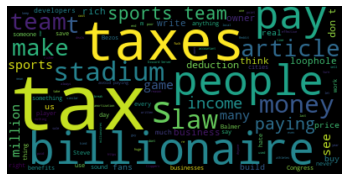

In [264]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt


# Create and generate a word cloud image
my_cloud = WordCloud(stopwords=my_stop_words).generate(sent)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")
# Don't forget to show the final image
plt.show()

#### using textblob

In [79]:
# Import the required packages
from textblob import TextBlob

In [80]:
total_polarity=[]
i=1
for comment in posts.comments[post_number]:
    # Create a textblob object  
    comm = TextBlob(comment)
    # Print out the sentiment
    print(f"comment {i} : {comment}")
    print("\n")
    print(comm.sentiment)
    total_polarity.append(comm.sentiment[0])
    print("---------------------------------------------------\n")

comment 1 : [**Join Our Discord Server!**](https://discord.gg/233aU5q)

**Welcome to /r/sports**

We created a Discord server for our community and would like to invite all of you to join! You'll be able to discuss sports with users around the world and discuss events in real time!

There are separate channels for many sports you can opt in and out of, including;

American Football, Soccer, Baseball, Basketball, Aussie Rules Football, Rugby Union and League, Cricket, Motorsports, Fitness, and many more.

[**Reddit Sports Discord Server**](https://discord.gg/233aU5q)


Sentiment(polarity=0.4642857142857143, subjectivity=0.47500000000000003)
---------------------------------------------------

comment 1 : This is going to be so awkward and quiet.


Sentiment(polarity=-0.3, subjectivity=0.6666666666666666)
---------------------------------------------------

comment 1 : Things like high jumpers doing the over head clap to pump the crowd up for their jump is going to be awkward.


Sentimen

#### Above . the polarity of 1 means the comment is totally positive and -1 means the totally negative.
#### The subjectivity ranges from 0-1 and 0 means the comment is objective and 1 means the the comment is subjective

In [81]:
import numpy as np
sum(np.array(total_polarity)<0)/len(total_polarity)

0.4028776978417266

In [82]:
print(f"total negative sentiments: {sum(np.array(total_polarity)<0)}")

total negative sentiments: 56


In [91]:
print(f"total positive sentiments: {sum(np.array(total_polarity)>0)}")

total positive sentiments: 45


In [84]:
print(f"total neutral sentiments: {sum(np.array(total_polarity)==0)}")

total neutral sentiments: 38


#### VADER Sentiment Analysis 

In [85]:
import nltk

In [86]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


In [87]:
vader_ratings=[]
for comment in all_comments[post_number]: 
    compound = sid.polarity_scores(comment)['compound']
    print(f"comment {i} : {comment}")
    print("\n")
    print(compound)
    vader_ratings.append(compound)
    print("---------------------------------------------------\n")

comment 1 : [**Join Our Discord Server!**](https://discord.gg/233aU5q)

**Welcome to /r/sports**

We created a Discord server for our community and would like to invite all of you to join! You'll be able to discuss sports with users around the world and discuss events in real time!

There are separate channels for many sports you can opt in and out of, including;

American Football, Soccer, Baseball, Basketball, Aussie Rules Football, Rugby Union and League, Cricket, Motorsports, Fitness, and many more.

[**Reddit Sports Discord Server**](https://discord.gg/233aU5q)


0.2905
---------------------------------------------------

comment 1 : This is going to be so awkward and quiet.


-0.2769
---------------------------------------------------

comment 1 : Things like high jumpers doing the over head clap to pump the crowd up for their jump is going to be awkward.


0.2263
---------------------------------------------------

comment 1 : So the economic benefit of putting on the games is c

In [88]:
print(f"total negative sentiments: {sum(np.array(vader_ratings)<0)}")

total negative sentiments: 56


In [89]:
print(f"total positive sentiments: {sum(np.array(vader_ratings)>0)}")

total positive sentiments: 49


In [90]:
print(f"total neutral sentiments: {sum(np.array(vader_ratings)==0)}")

total neutral sentiments: 34


#### Flair sentiment analysis

In [92]:
import flair
flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

2021-07-10 12:25:19,287 loading file C:\Users\lfc\.flair\models\sentiment-en-mix-distillbert_4.pt


In [93]:
flair_ratings=[]
for comment in posts.comments[post_number]:
    s = flair.data.Sentence(comment)
    flair_sentiment.predict(s)
    total_sentiment = s.labels
    print(f"comment {i} : {comment}")
    print("\n")
    print(total_sentiment)
    flair_ratings.append(total_sentiment)
    print("---------------------------------------------------\n")

comment 1 : [**Join Our Discord Server!**](https://discord.gg/233aU5q)

**Welcome to /r/sports**

We created a Discord server for our community and would like to invite all of you to join! You'll be able to discuss sports with users around the world and discuss events in real time!

There are separate channels for many sports you can opt in and out of, including;

American Football, Soccer, Baseball, Basketball, Aussie Rules Football, Rugby Union and League, Cricket, Motorsports, Fitness, and many more.

[**Reddit Sports Discord Server**](https://discord.gg/233aU5q)


[POSITIVE (0.9795)]
---------------------------------------------------

comment 1 : This is going to be so awkward and quiet.


[NEGATIVE (0.9908)]
---------------------------------------------------

comment 1 : Things like high jumpers doing the over head clap to pump the crowd up for their jump is going to be awkward.


[NEGATIVE (0.9996)]
---------------------------------------------------

comment 1 : So the economi

comment 1 : Isn't the whole fucking point of hosting the Olympics to draw tourists and spectators?


[NEGATIVE (0.9986)]
---------------------------------------------------

comment 1 : Unless you’re rich and/or famous. Then you get your orange fancy press box.


[NEGATIVE (0.9909)]
---------------------------------------------------

comment 1 : Tell me about it. Lol.


[POSITIVE (0.9606)]
---------------------------------------------------

comment 1 : Surely they need to have other athletes spectate, just for some support.


[NEGATIVE (0.809)]
---------------------------------------------------

comment 1 : Should've never held it then imo  lol


[NEGATIVE (0.8403)]
---------------------------------------------------

comment 1 : Why.


[NEGATIVE (0.9179)]
---------------------------------------------------

comment 1 : Hunger GAME vibes


[POSITIVE (0.7106)]
---------------------------------------------------

comment 1 : Why are they going ahead with this?


[NEGATIVE (0.9992)]
--

comment 1 : What a joke. Isn't there a reason we didn't hold it in 2020?  And what's with the transgender thing? They are allowing a male to female trans person compete in the weightlifting. Already has set a record as the oldest female weightlifting competitor. But in track they're not allowed? Absolute shambles. I mean, disgraceful honestly.


[NEGATIVE (1.0)]
---------------------------------------------------

comment 1 : This sucks but I don't get all the comments feeling bad for Japan. They did this to themselves. Their vaccine rollout is awful and it is what it is.

If anything you could blame them for this because if they had done their vaccinations correctly it wouldn't be as much of an issue


[NEGATIVE (0.9999)]
---------------------------------------------------

comment 1 : I'm sick of hearing people saying the Olympics can't be held safely and denying these athletes once in a lifetime opportunities for most of them. Several sports have been playing with great success incl

comment 1 : Lol they should've cancelled it. Of course, when I said that all I got were messages about how "the rest of the world would go back to normal" and that "you should go outside and quit being a sheep". Fucking global pandemic, and Japanese vaccine rollout has been absolute shit, with something like 15% of their population vaccinated now. But of course, they didn't care about that. Bunch of idiots never accepted that Covid was here to stay, and I bet they still won't. 

So now it's just a giant waste of money, and it's gonna be awkward as hell because of the silence during competitions. Bet they thought they were gonna be able to put on a Paul McCartney "We are the World" type spectacle lmao.


[NEGATIVE (1.0)]
---------------------------------------------------

comment 1 : These olympics are going to suck. Not to mention the time difference. I’ll pass on these games and get them the next time around. What a waste, they should have moved the games to the US then given Japan t

In [119]:
flair_ratings_score=[]
for i in range(len(flair_ratings)):
    if flair_ratings[i][0].value == 'POSITIVE':
        flair_ratings_score.append(flair_ratings[i][0].score)
    else:
        s=-1*flair_ratings[i][0].score
        flair_ratings_score.append(s)

In [125]:
print(f"total negative sentiments comment: {sum(np.array(flair_ratings_score)<0)} \n total average negavite sentiments:{np.mean(np.array(flair_ratings_score)<0) }")

total negative sentiments comment: 118 
 total average negavite sentiments:0.8489208633093526


In [126]:
print(f"total positive sentiments comments: {sum(np.array(flair_ratings_score)>0)}\n total average positive sentiments:{np.mean(np.array(flair_ratings_score)>0) }")

total positive sentiments comments: 21
 total average positive sentiments:0.1510791366906475
